In [3]:
import defdap
import matplotlib.pyplot as plt
import pandas as pd
import math
import numpy as np
import pickle
%matplotlib inline

In [4]:
region = 'A3_zone1'
output='../results/1_figures/'

In [3]:
CP_mean_strain = np.load('{}_mean_strain.npy'.format(region)) #true strain
CP_mean_stress = np.load('{}_mean_stress.npy'.format(region)) # true stress
CP_eng_stress = CP_mean_stress[:,0,0] / (np.exp(CP_mean_strain[:,0,0]))

In [4]:
e11 = np.load('e11_{}.npy'.format(region))
force_at_image_a3 = [30,113,332,1451, 1896,2342,2791,3250,3707, 4131,4495,4714,4823, 4860, 4915,4946,4974,4988,5009] # b2 named from tanist
force_at_image_b2 = [91,333,684,1985, 2461,2938,3417,3882,4271, 4518,4625, 4683, 4717,4742,4760,4773] # a3 named from tanist

width  = 3    /1000 #mm -> m
depth  = 1.75 /1000 #mm -> m
area = width * depth
exp_eng_stress_at_image_b2 = np.array(force_at_image_b2) / (area * 1000000)
exp_eng_stress_at_image_a3 = np.array(force_at_image_a3) / (area * 1000000)

In [5]:
#len(A3_zone2_e11)

In [6]:
plt.figure(figsize=(8,6),dpi=1200)
plt.scatter(e11,exp_eng_stress_at_image_a3[0:len(e11)],label='Exp')
plt.plot(CP_mean_strain[:,0,0],CP_eng_stress/1e6,label='CP')
plt.xlabel('True e11 strain ()')
plt.ylabel('Engineering stress (MPa)')
plt.xlim(0,0.02)
plt.legend(loc='upper left')
plt.title(region)
plt.savefig(output + '{}_stress_strain_curve.png'.format(region))

In [5]:
file_name = "{}_strain_comparison.pickle".format(region)
with open(file_name, "rb") as pickle_file:
    strain_comparison = pickle.load(pickle_file)
#strain_comparison['step_11']

In [8]:
df = pd.DataFrame(strain_comparison['step_11'],columns=['Grain ID',r'Grain size ($\mu m^2$)','DIC e11','DIC ESS','CP e11','CP ESS'])
df

Grain ID  Grain size ($\mu m^2$)   DIC e11   DIC ESS    CP e11    CP ESS
0       526.0              686.054688  0.008987  0.008219  0.009143  0.009267
1       553.0               60.585938  0.009776  0.009717  0.011839  0.010904
2       582.0               11.035156  0.009472  0.008716  0.010724  0.011320
3       616.0             1975.156250  0.009954  0.008641  0.015596  0.014649
4       632.0                6.835938  0.010979  0.011773  0.009559  0.009308
..        ...                     ...       ...       ...       ...       ...
160    1228.0                1.542969  0.006543  0.006601  0.009587  0.008779
161    1229.0                2.167969  0.007723  0.006857  0.009292  0.008748
162    1234.0                1.191406  0.006930  0.007558  0.010907  0.011216
163    1239.0                1.777344  0.006349  0.006062  0.009137  0.009378
164    1240.0                1.074219  0.009052  0.008307  0.009859  0.010213

[165 rows x 6 columns]

x = np.linspace(0, 0.015, 100)
y=x

plt.figure(figsize=(8,8),dpi=600)
plt.scatter(strain_comparison['step_11'][:,6],strain_comparison['step_11'][:,2],label='ESS')
plt.scatter(strain_comparison['step_11'][:,7],strain_comparison['step_11'][:,3],label='e11')
plt.plot(x, y)
plt.xlim(0,0.015)
plt.ylim(0,0.015)
plt.ylabel('HRDIC')
plt.xlabel('CP')
plt.legend()

In [9]:
ESS_differences = strain_comparison['step_11'][:,5]-strain_comparison['step_11'][:,3] #CP - HRDIC
e11_differences = strain_comparison['step_11'][:,4]-strain_comparison['step_11'][:,2] #CP - HRDIC


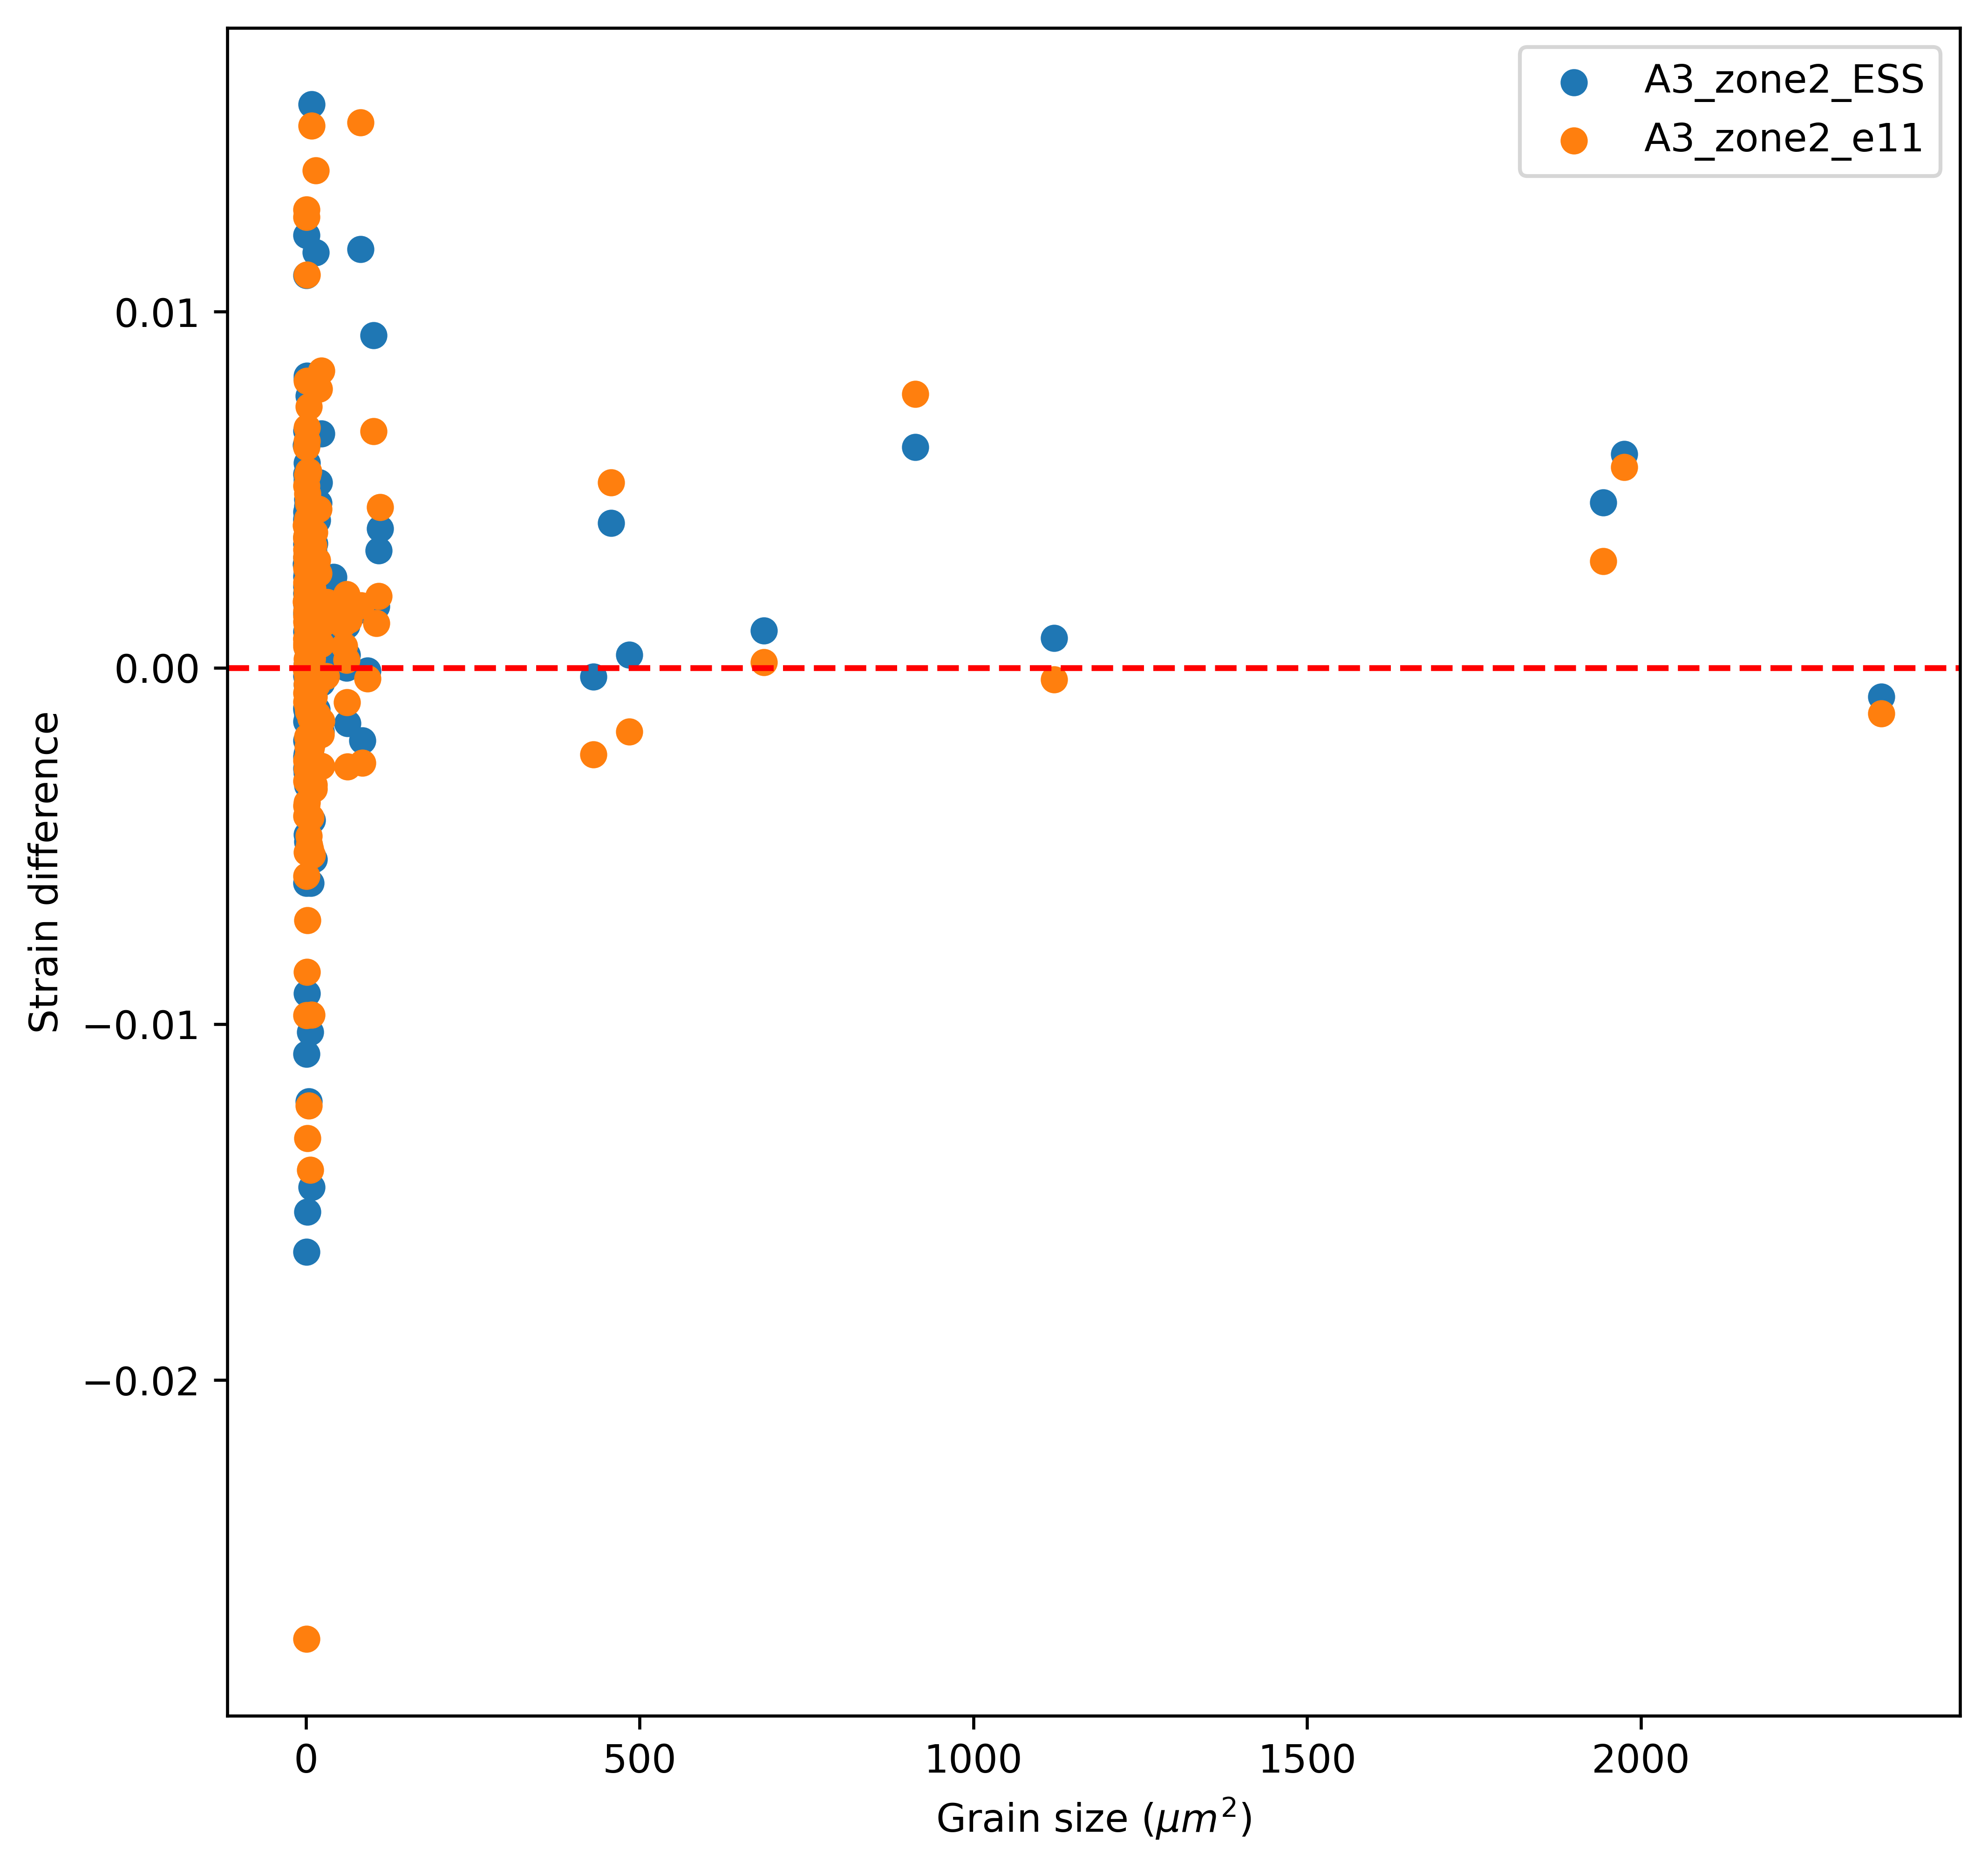

In [10]:
plt.figure(figsize=(8,8),dpi=600)
plt.scatter(strain_comparison['step_11'][:,1],ESS_differences,label='A3_zone2_ESS')
plt.scatter(strain_comparison['step_11'][:,1],e11_differences,label='A3_zone2_e11')
plt.axhline(0, color='r', linestyle='--')
plt.xlabel(r'Grain size ($\mu m^2$)')
plt.ylabel('Strain difference')
plt.legend()

In [11]:
CP_mean_shear_strain = np.load('mean_shear_strain_a3_zone2.npy')
DIC_mean_shear_strain = np.load('DIC_shear_strain_A3_zone2.npy')
#CP_mean_shear_strain
#len(DIC_mean_shear_strain[2:])
#len(CP_mean_shear_strain)

In [12]:
mean_HRDIC_ESS = []
mean_CP_ESS = []
std_HRDIC_ESS = []
std_CP_ESS = []
HRDIC_mean_ESS = []
HRDIC_std_ESS = []
CP_mean_ESS=[]

mean_HRDIC_e11 = []
mean_CP_e11 = []
std_HRDIC_e11 = []
std_CP_e11 = []

c=3
for step in range(0,len(strain_comparison)):
    mean_HRDIC_ESS.append(np.mean(strain_comparison['step_{}'.format(step+c)][:,3]))
    mean_CP_ESS.append(np.mean(strain_comparison['step_{}'.format(step+c)][:,5]))
    std_HRDIC_ESS.append(np.std(strain_comparison['step_{}'.format(step+c)][:,3]))
    std_CP_ESS.append(np.std(strain_comparison['step_{}'.format(step+c)][:,5]))
        
    mean_HRDIC_e11.append(np.mean(strain_comparison['step_{}'.format(step+c)][:,2]))
    mean_CP_e11.append(np.mean(strain_comparison['step_{}'.format(step+c)][:,4]))
    std_HRDIC_e11.append(np.std(strain_comparison['step_{}'.format(step+c)][:,2]))
    std_CP_e11.append(np.std(strain_comparison['step_{}'.format(step+c)][:,4]))

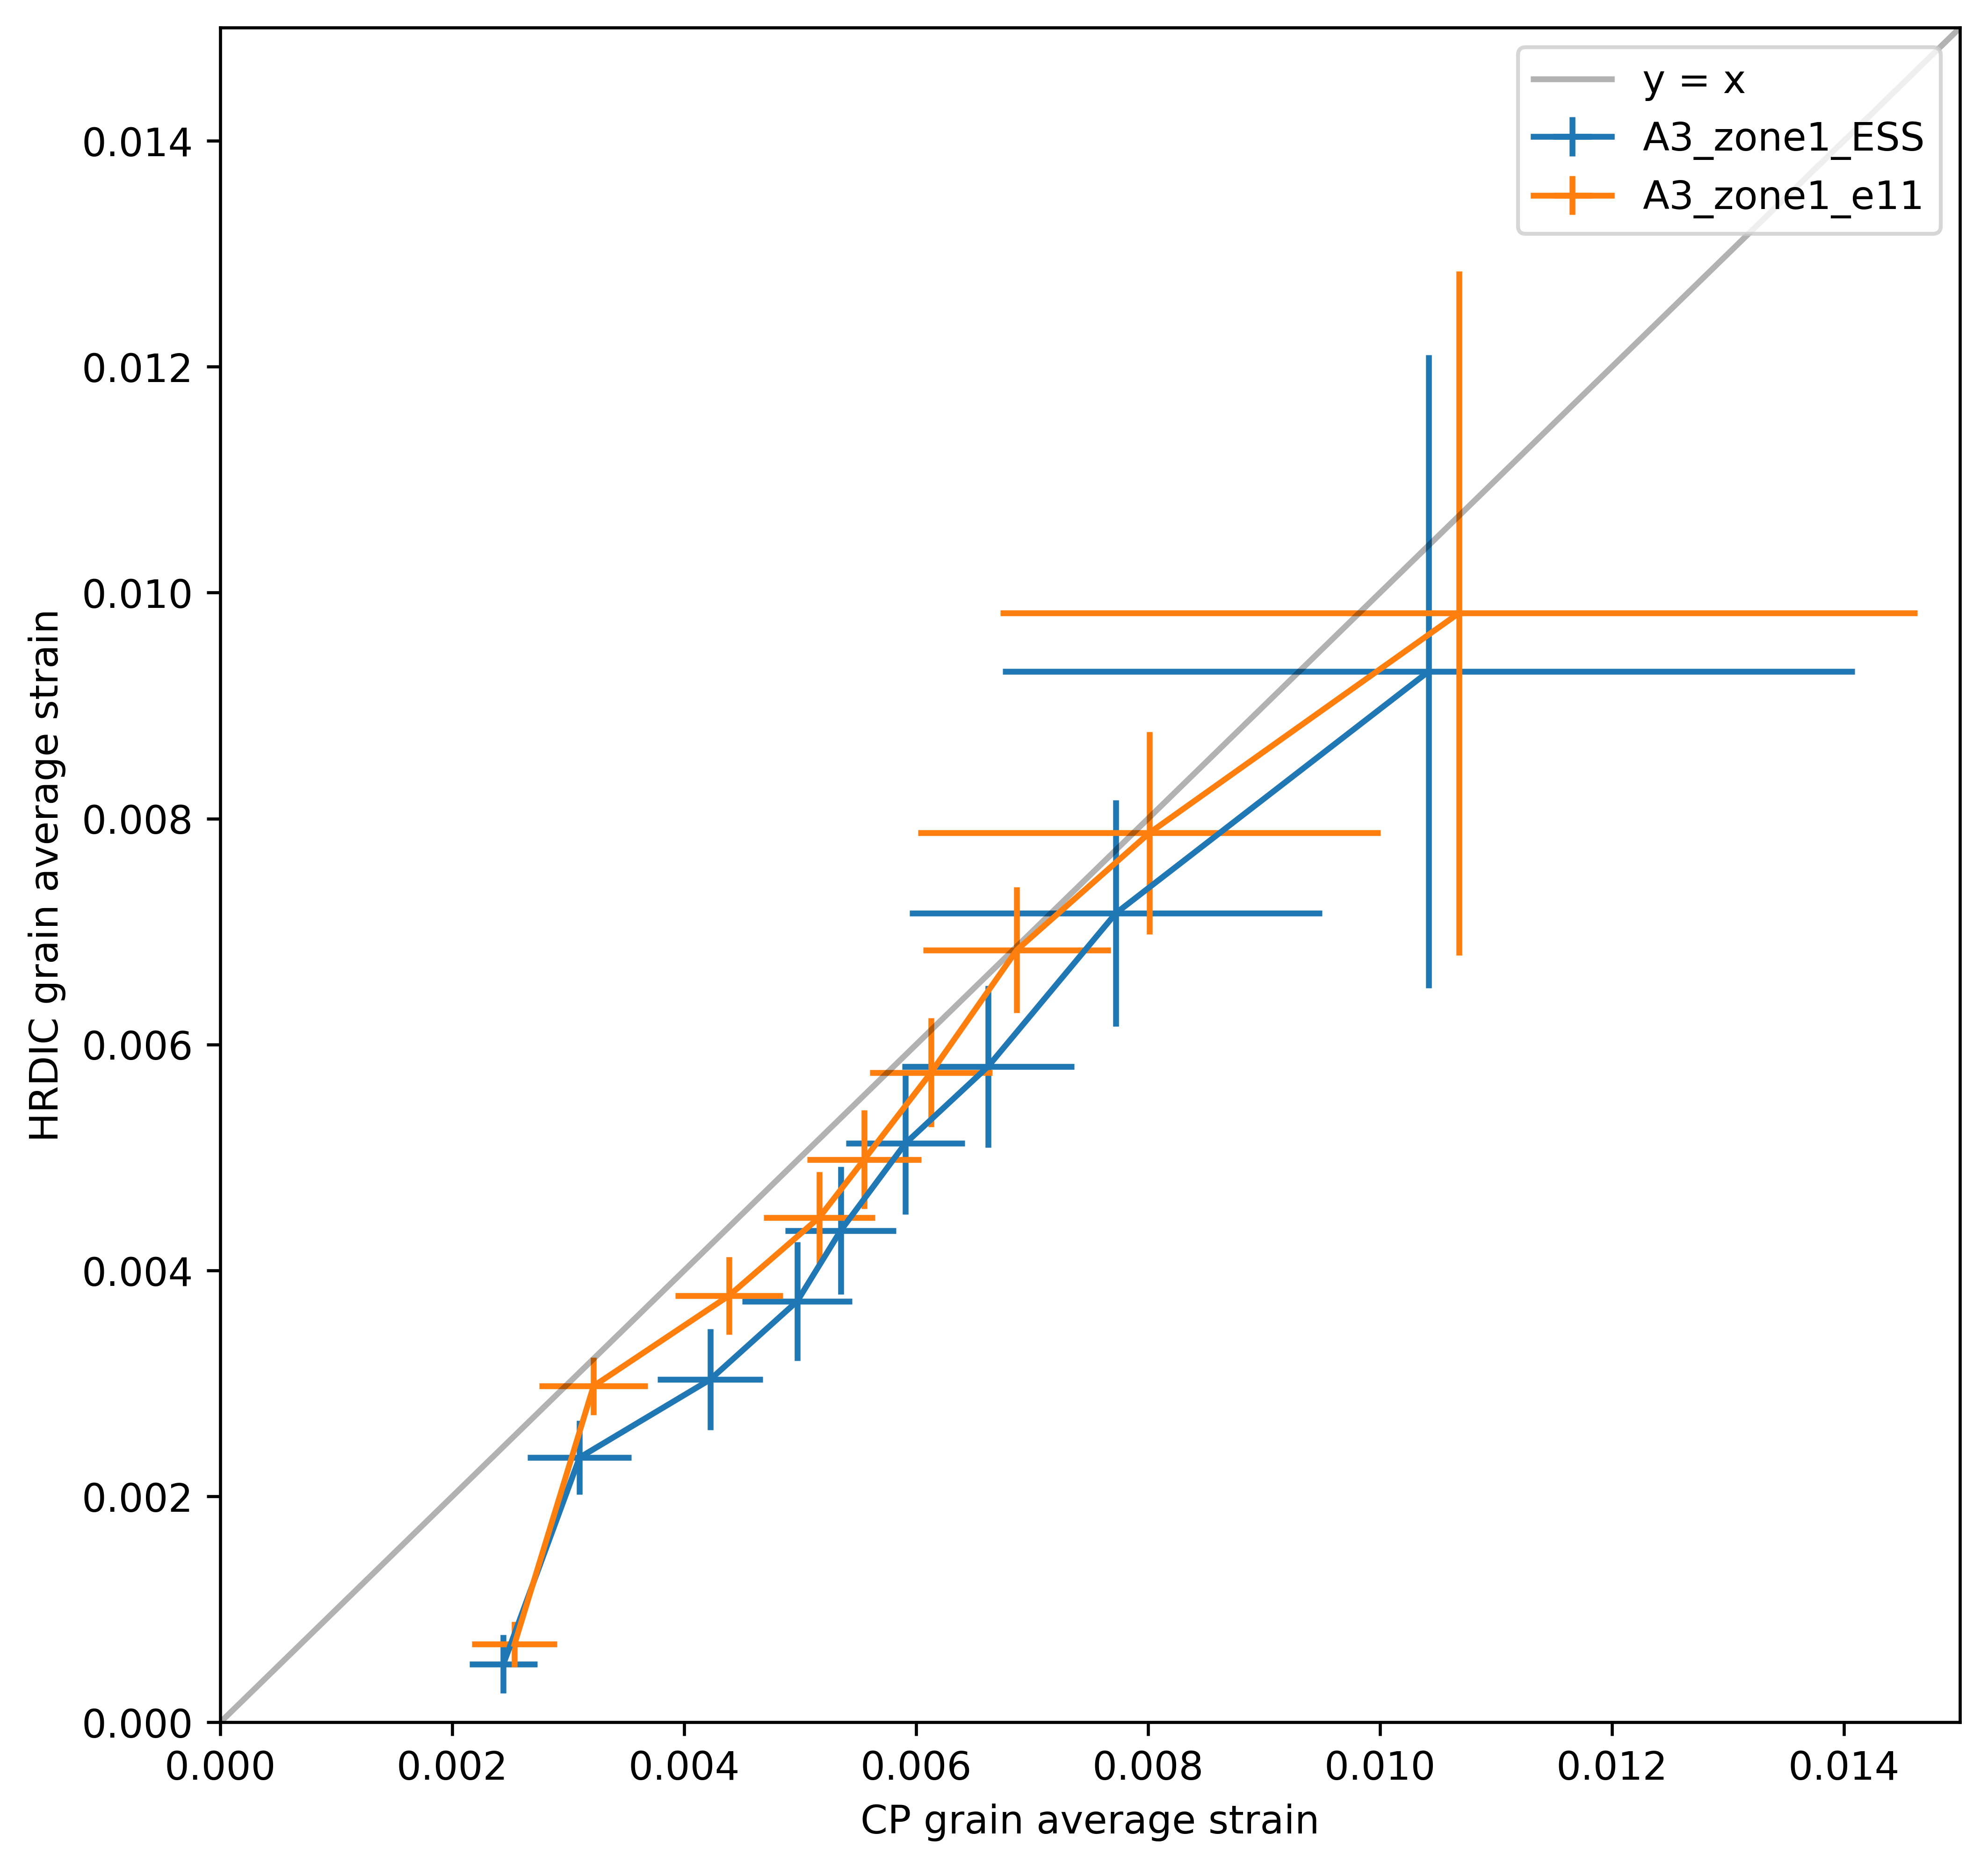

In [13]:
plt.figure(figsize=(8,8),dpi=600)
plt.errorbar(mean_CP_ESS,mean_HRDIC_ESS,std_CP_ESS,std_HRDIC_ESS,label='{}_ESS'.format(region))
plt.errorbar(mean_CP_e11,mean_HRDIC_e11,std_CP_e11,std_HRDIC_e11,label='{}_e11'.format(region))
x = np.linspace(0,0.1,100)
y1 = x
plt.plot(x, y1, 'k-', alpha=0.3,label = 'y = x')


plt.ylim(0,0.015)
plt.xlim(0,0.015)
plt.xlabel('CP grain average strain')
plt.ylabel('HRDIC grain average strain')
plt.legend(loc='upper right')
plt.savefig(output + '{}_strain_strain_curve.png'.format(region))

In [14]:
small_grain_size = (np.mean(strain_comparison['step_11'][:,1]))/10
num_small_grians = len([x for x in strain_comparison['step_11'][:,1] if x < small_grain_size])

print("Number of grains smaller than 10% of the mean is:", num_small_grians, "grains. Which is",
      int((num_small_grians/len(strain_comparison['step_11'][:,1]))*100), "%." )

Number of grains smaller than 10% of the mean is: 99 grains. Which is 60 %.


In [15]:
data_list = strain_comparison['step_11'].tolist()
filtered_data_list = [row for row in data_list if row[1] >= 50]
filtered_data = np.array(filtered_data_list)
#(filtered_data)

In [16]:
filtered_ESS_differences = filtered_data[:,5]-filtered_data[:,3] #CP - HRDIC
filtered_e11_differences = filtered_data[:,4]-filtered_data[:,2] #CP - HRDIC

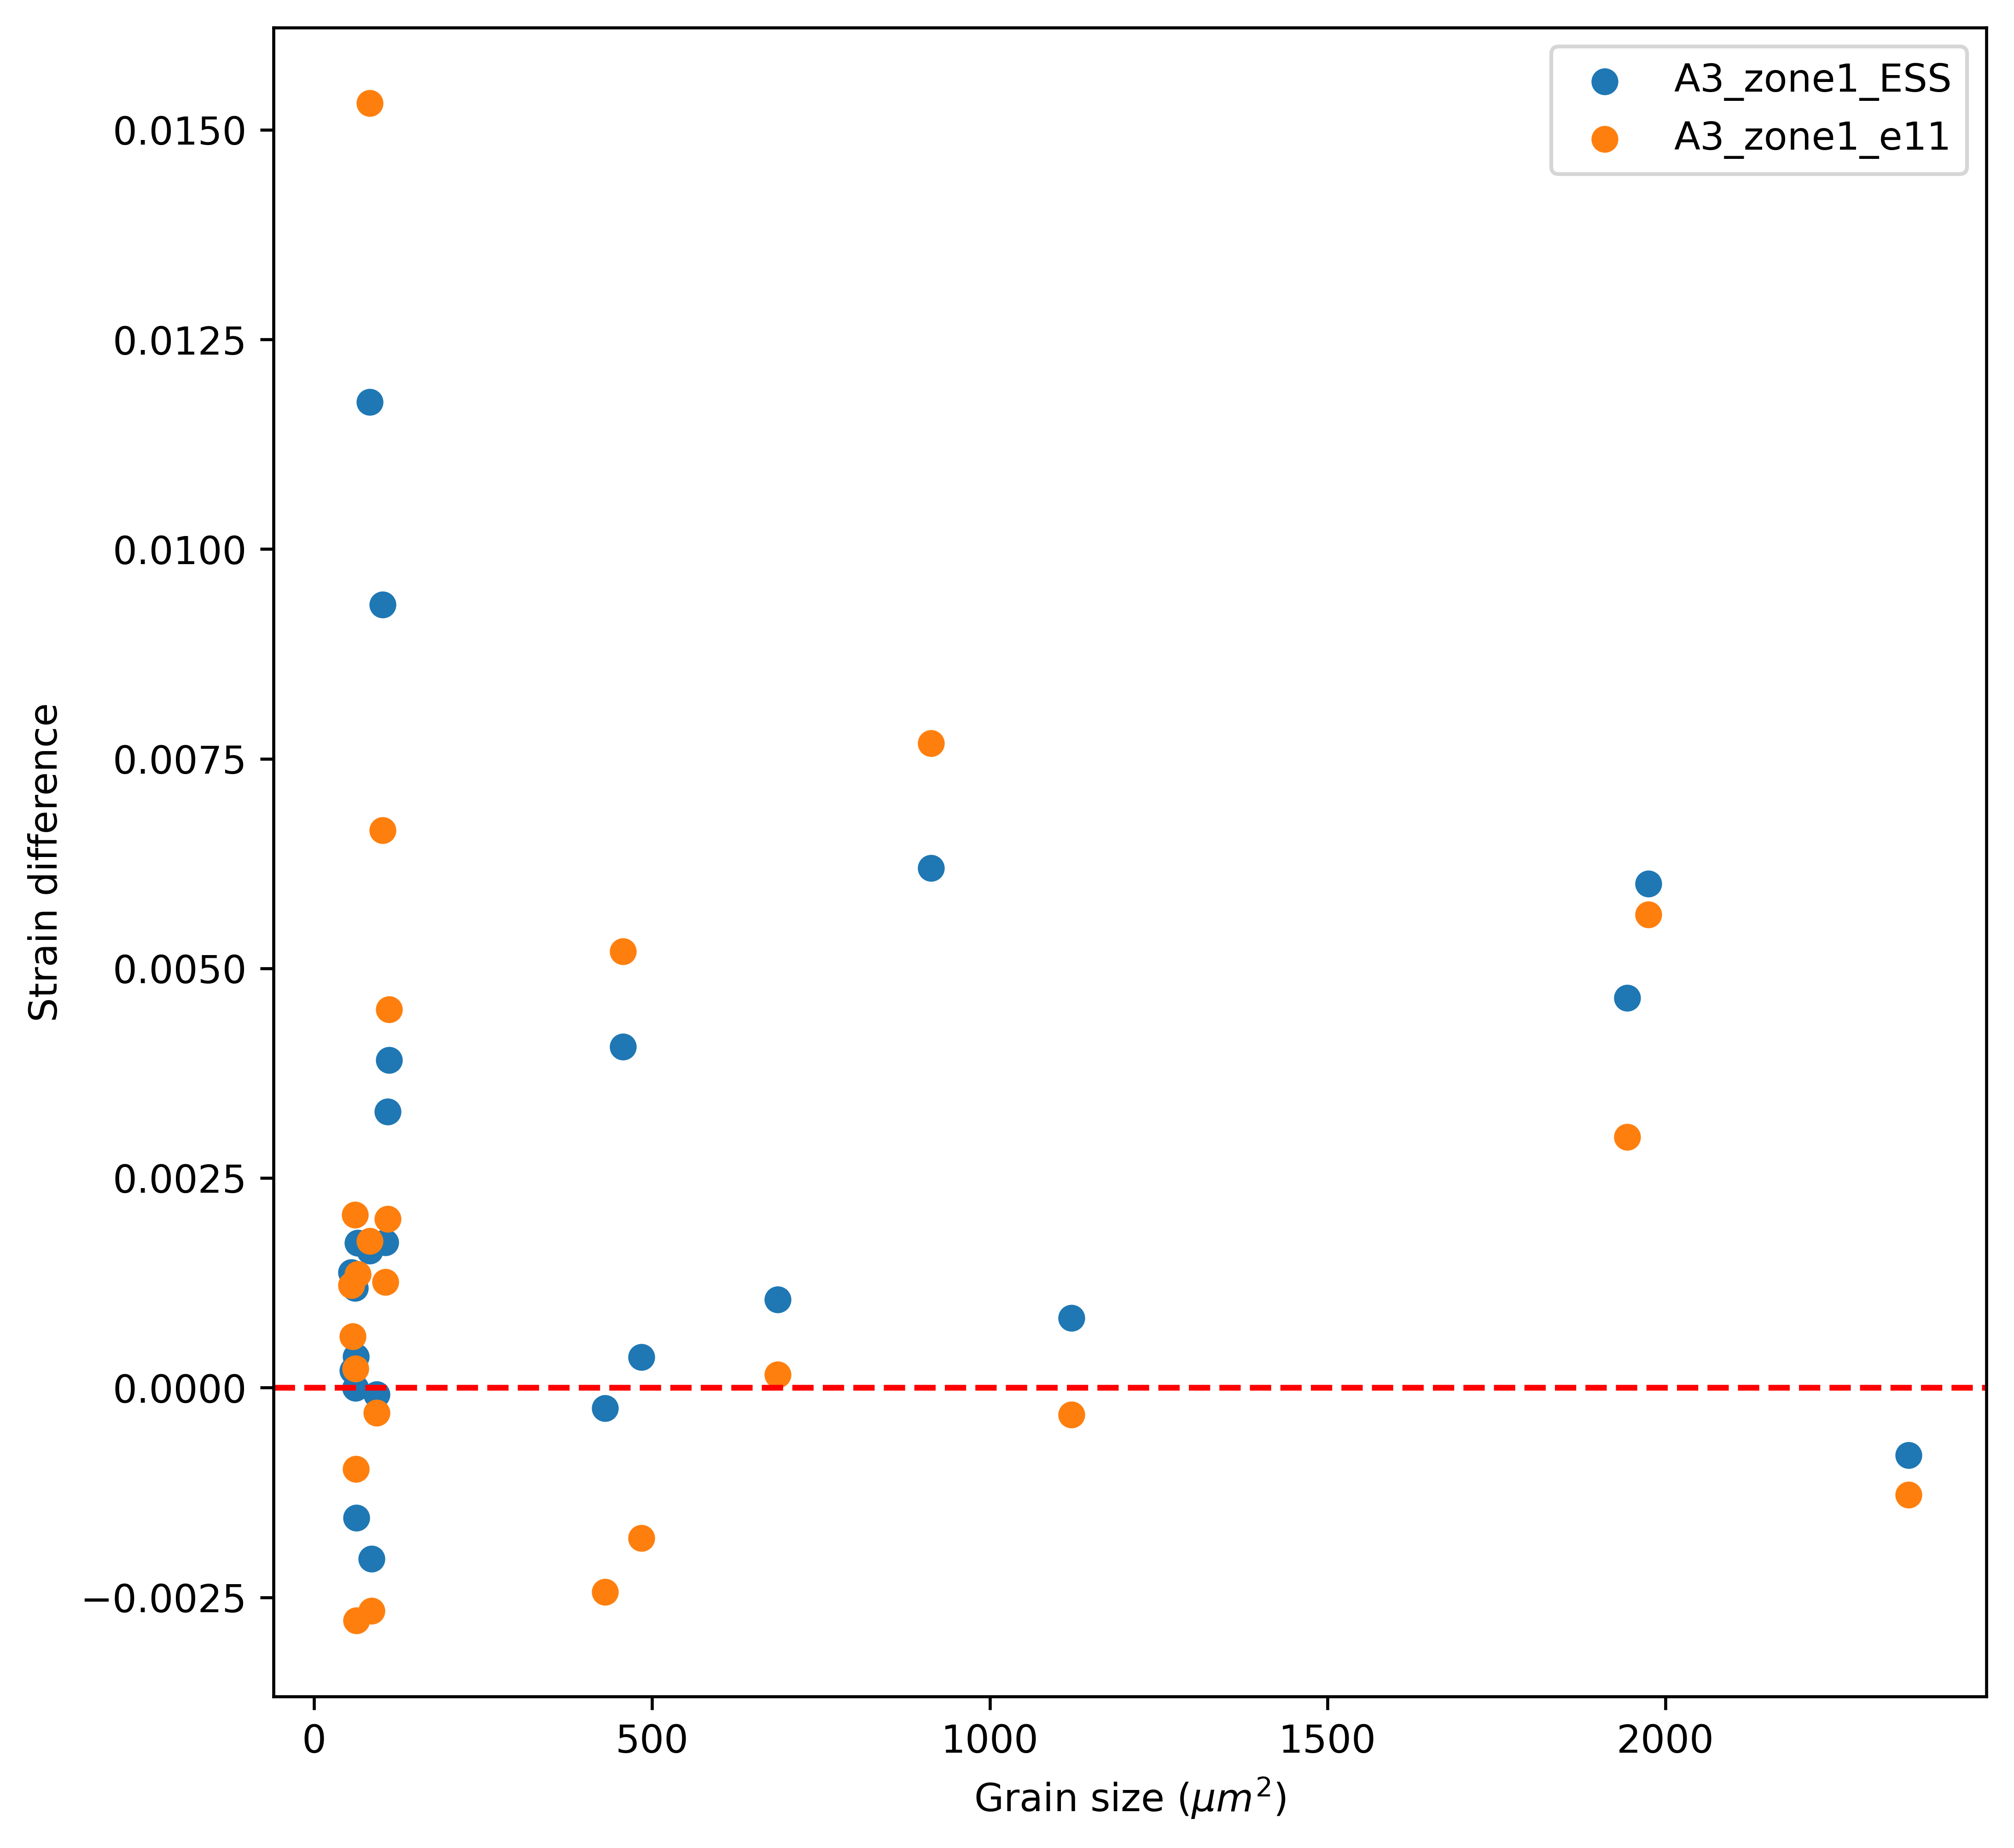

In [18]:
plt.figure(figsize=(8,8),dpi=600)
plt.scatter(filtered_data[:,1],filtered_ESS_differences,label='{}_ESS'.format(region))
plt.scatter(filtered_data[:,1],filtered_e11_differences,label='{}_e11'.format(region))
plt.axhline(0, color='r', linestyle='--')
plt.xlabel(r'Grain size ($\mu m^2$)')
plt.ylabel('Strain difference')
plt.legend()

In [39]:
#max value
def max_pos(float_array):
    max_index = np.argmax(float_array)
    return max_index

In [19]:
filtered_mean_HRDIC_ESS = []
filtered_mean_CP_ESS = []
filtered_std_HRDIC_ESS = []
filtered_std_CP_ESS = []
filtered_data= {}
max_HRDIC_ESS_exp = []
max_HRDIC_ESS_sim = []
max_CP_ESS_exp = []
max_CP_ESS_sim = []

filtered_mean_HRDIC_e11=[]
filtered_mean_CP_e11=[]
filtered_std_HRDIC_e11=[]
filtered_std_CP_e11=[]
min_grain_size = 50#um

c=3
for step in range(0,len(strain_comparison)):
    data_list= strain_comparison['step_{}'.format(step+c)].tolist()
    filtered_data_list = [row for row in data_list if row[1] >= min_grain_size]
    filtered_data['step_{}'.format(step+c)] = np.array(filtered_data_list)
    #(filtered_data)


for step in range(0,len(strain_comparison)):
    filtered_mean_HRDIC_ESS.append(np.mean(filtered_data['step_{}'.format(step+c)][:,3]))
    filtered_mean_CP_ESS.append(np.mean(filtered_data['step_{}'.format(step+c)][:,5]))
    filtered_std_HRDIC_ESS.append(np.std(filtered_data['step_{}'.format(step+c)][:,3]))
    filtered_std_CP_ESS.append(np.std(filtered_data['step_{}'.format(step+c)][:,5]))
    b=np.argmax(filtered_data['step_{}'.format(step+c)][:,3])
    d=np.argmax(filtered_data['step_{}'.format(step+c)][:,5])
    max_HRDIC_ESS_exp.append(filtered_data['step_{}'.format(step+c)][:,3][b])
    max_HRDIC_ESS_sim.append(filtered_data['step_{}'.format(step+c)][:,5][b])
    max_CP_ESS_exp.append(filtered_data['step_{}'.format(step+c)][:,3][d])
    max_CP_ESS_sim.append(filtered_data['step_{}'.format(step+c)][:,5][d])
    
    filtered_mean_HRDIC_e11.append(np.mean(filtered_data['step_{}'.format(step+c)][:,2]))
    filtered_mean_CP_e11.append(np.mean(filtered_data['step_{}'.format(step+c)][:,4]))
    filtered_std_HRDIC_e11.append(np.std(filtered_data['step_{}'.format(step+c)][:,2]))
    filtered_std_CP_e11.append(np.std(filtered_data['step_{}'.format(step+c)][:,4]))

Text(0.5, 1.0, 'A3_zone1')

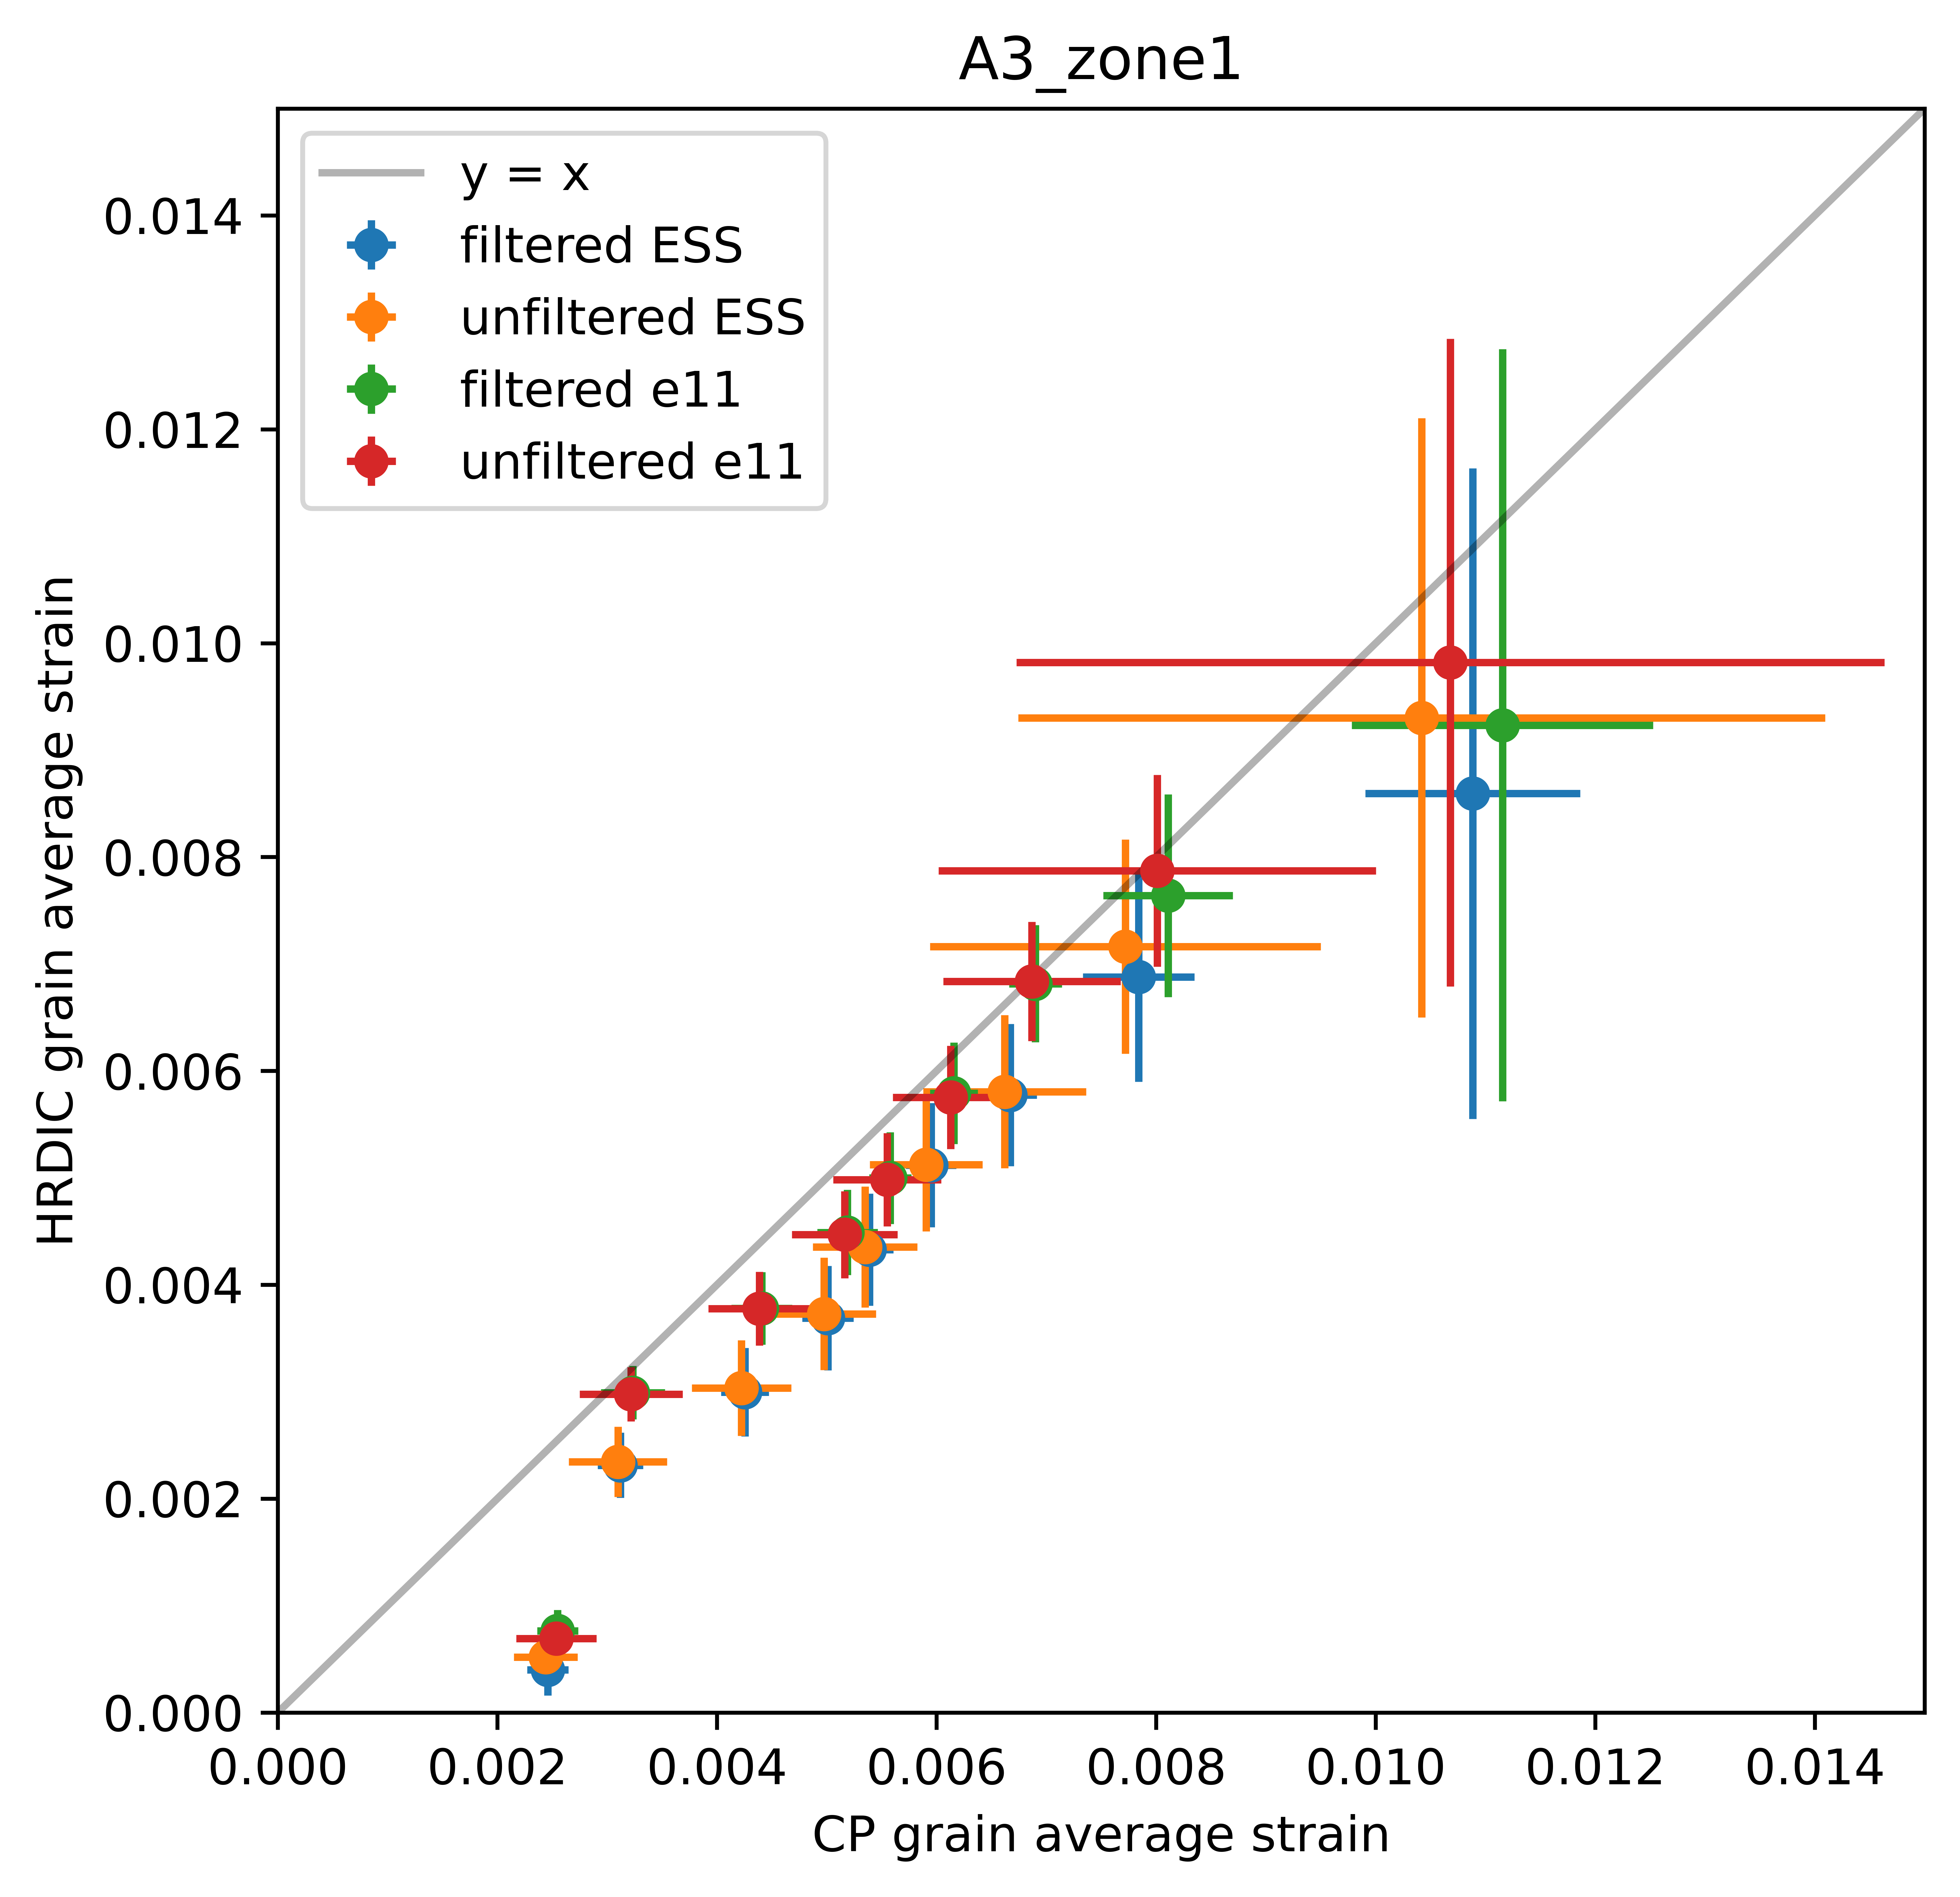

In [20]:
plt.figure(figsize=(6,6),dpi=1200)
plt.errorbar(filtered_mean_CP_ESS,filtered_mean_HRDIC_ESS,filtered_std_CP_ESS,filtered_std_HRDIC_ESS,label='filtered ESS',fmt='o')
plt.errorbar(mean_CP_ESS,mean_HRDIC_ESS,std_CP_ESS,std_HRDIC_ESS,label='unfiltered ESS',fmt='o')

plt.errorbar(filtered_mean_CP_e11,filtered_mean_HRDIC_e11,filtered_std_CP_e11,filtered_std_HRDIC_e11,label='filtered e11',fmt='o')
plt.errorbar(mean_CP_e11,mean_HRDIC_e11,std_CP_e11,std_HRDIC_e11,label='unfiltered e11',fmt='o')

#plt.scatter(max_HRDIC_ESS_sim,max_HRDIC_ESS_exp,label='HRDIC_max_strain')
#plt.scatter(max_CP_ESS_sim,max_CP_ESS_exp,label='CP_max_strain')
x = np.linspace(0,0.1,100)
y1 = x
plt.plot(x, y1, 'k-', alpha=0.3,label = 'y = x')

plt.ylim(0,0.015)
plt.xlim(0,0.015)
plt.xlabel('CP grain average strain')
plt.ylabel('HRDIC grain average strain')
plt.legend(loc='upper left')
plt.title(region)
#plt.savefig(output + '{}_strain_strain_plot.png'.format(region))

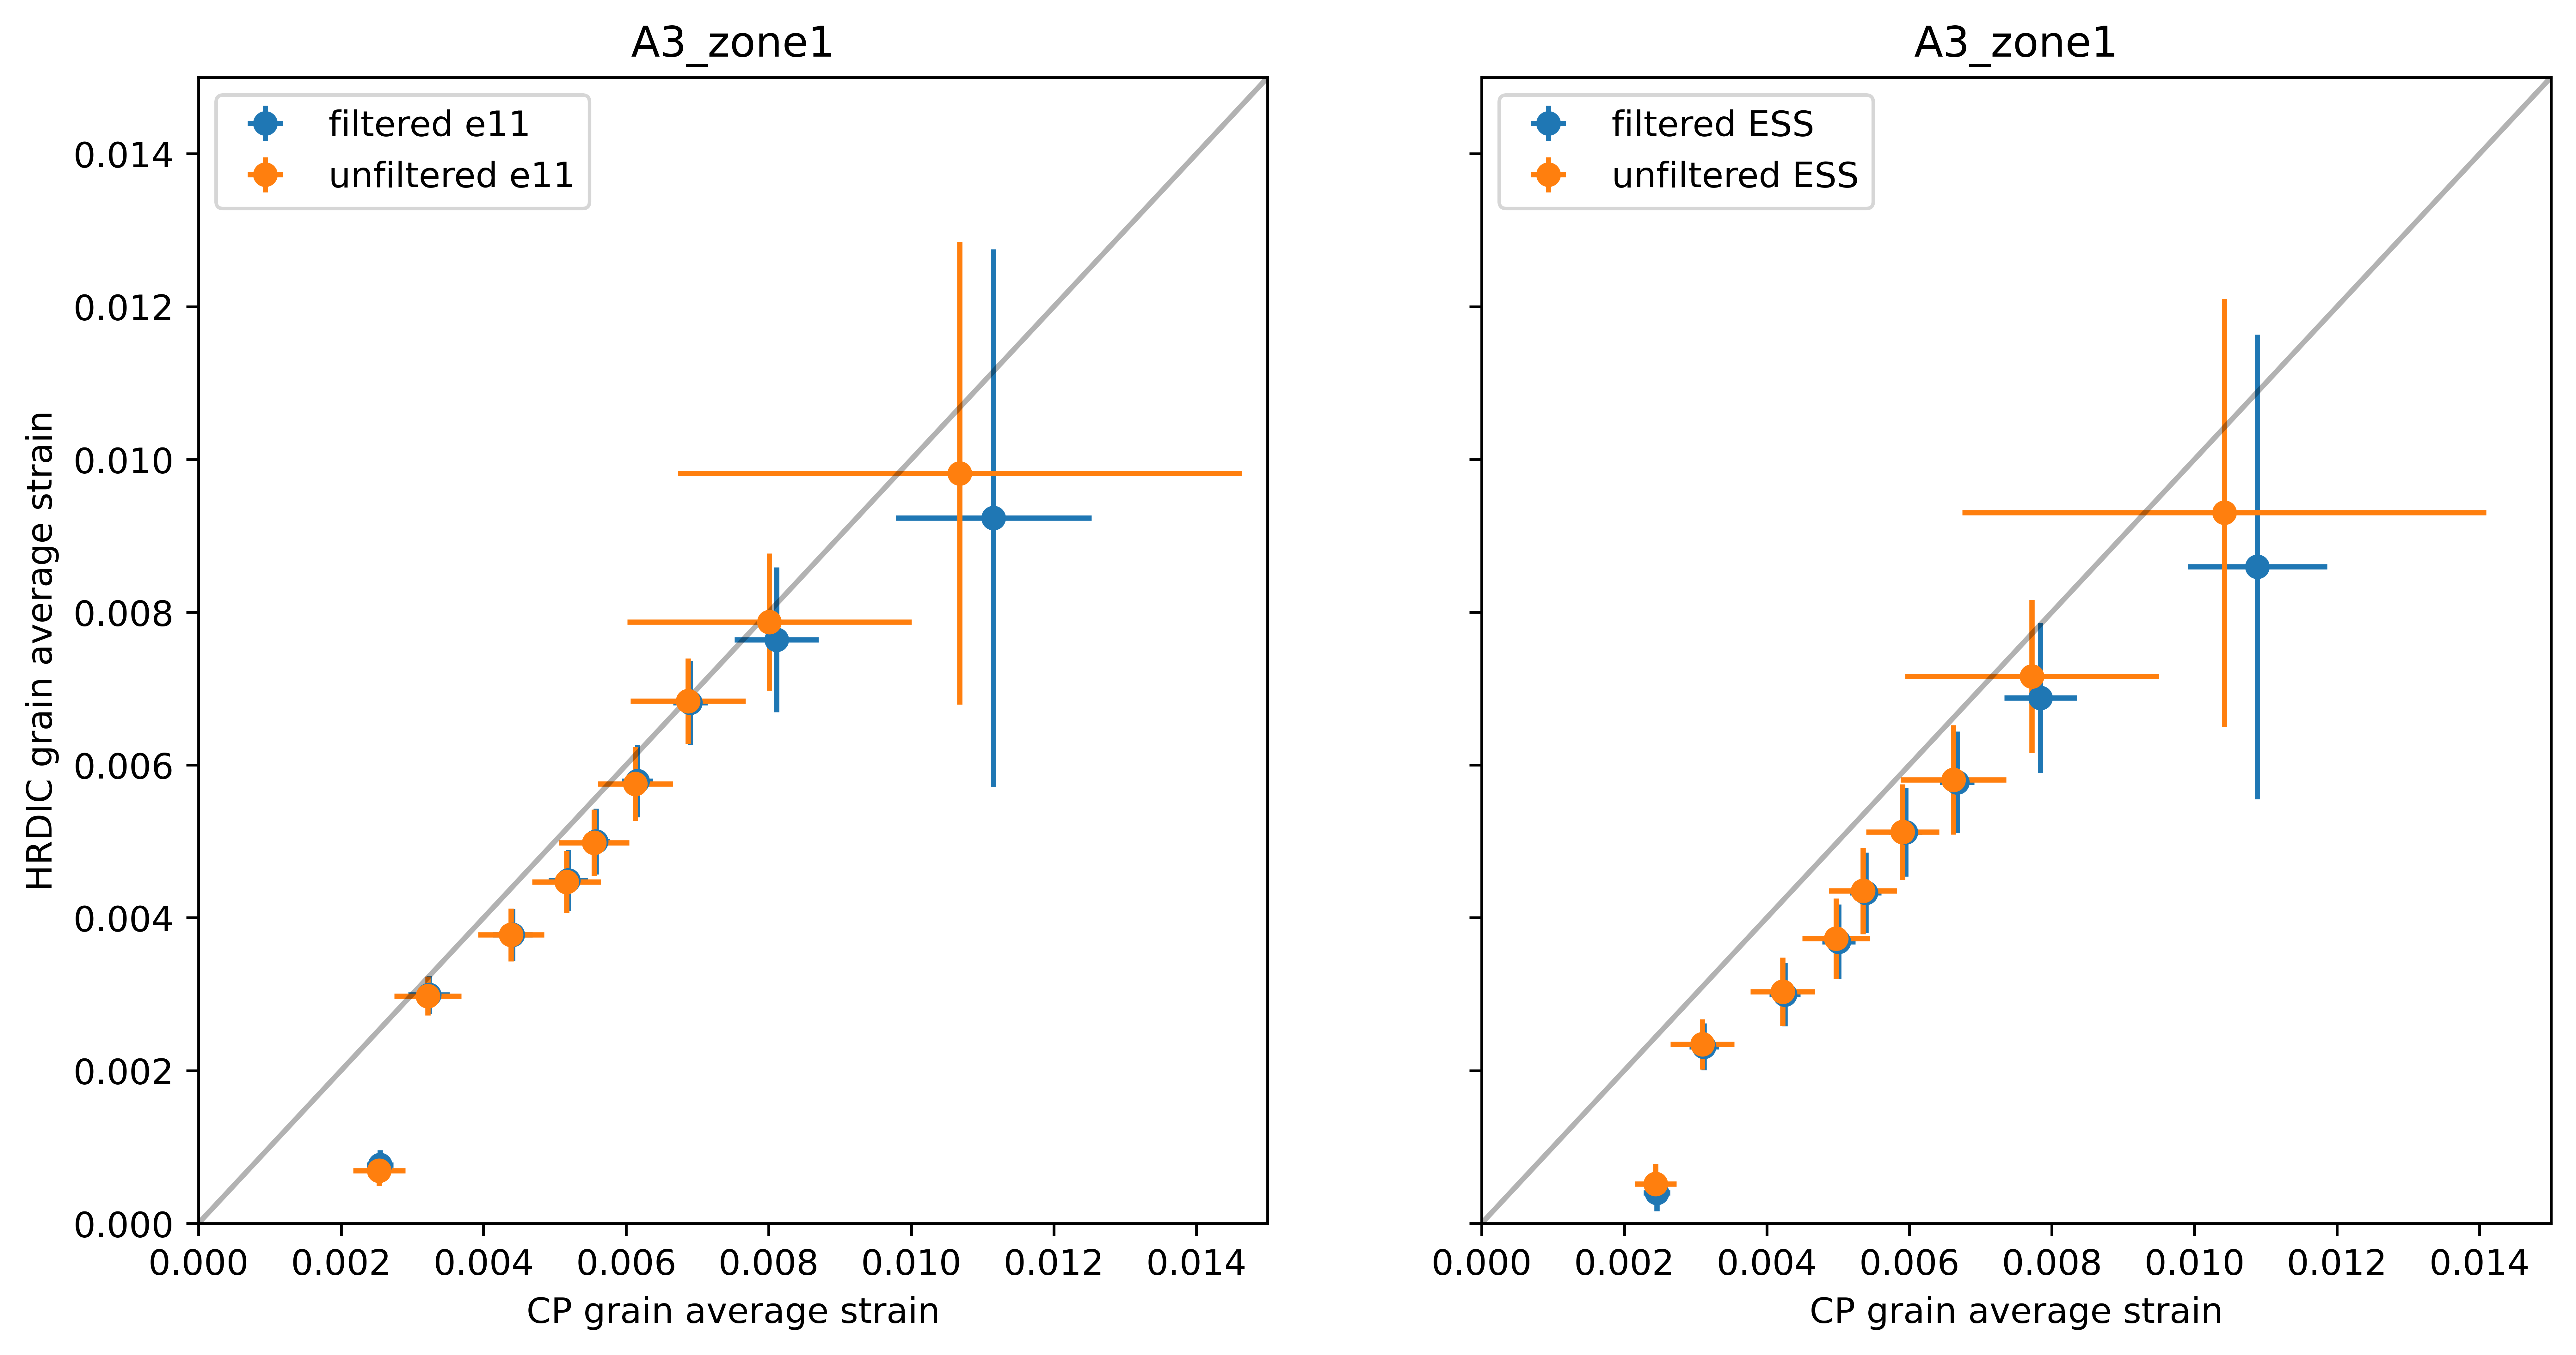

In [21]:

# Create a 1x2 grid of subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6), dpi=800, sharey=True)

# Plot on the left subplot
axs[0].errorbar(filtered_mean_CP_e11, filtered_mean_HRDIC_e11, filtered_std_CP_e11, filtered_std_HRDIC_e11, label='filtered e11', fmt='o')
axs[0].errorbar(mean_CP_e11, mean_HRDIC_e11, std_CP_e11, std_HRDIC_e11, label='unfiltered e11', fmt='o')
axs[0].set_xlabel('CP grain average strain')
axs[0].set_ylabel('HRDIC grain average strain')
axs[0].set_title(region)
axs[0].legend(loc='upper left')
axs[0].set_xlim(0, 0.015)
# Plot on the right subplot
axs[1].errorbar(filtered_mean_CP_ESS, filtered_mean_HRDIC_ESS, filtered_std_CP_ESS, filtered_std_HRDIC_ESS, label='filtered ESS', fmt='o')
axs[1].errorbar(mean_CP_ESS, mean_HRDIC_ESS, std_CP_ESS, std_HRDIC_ESS, label='unfiltered ESS', fmt='o')
axs[1].set_xlabel('CP grain average strain')
axs[1].set_title(region)
axs[1].legend(loc='upper left')
axs[1].set_xlim(0, 0.015)
# Add a line y=x to both subplots
for ax in axs:
    ax.plot(x, y1, 'k-', alpha=0.3, label='y = x')

# Set common y-axis label
#fig.text(0.5, 0.04, 'HRDIC grain average strain', ha='center')
plt.ylim(0, 0.015)
plt.savefig(output + '{}_filtered_strain_strain_curve.png'.format(region))

plt.show()

In [ ]:
np.save('filtered_CP_ESS_{}'.format(region),filtered_mean_CP_ESS)
np.save('CP_ESS_{}'.format(region),mean_CP_ESS)
np.save('filtered_CP_ESS_{}'.format(region),filtered_mean_CP_ESS)
np.save('CP_ESS_{}'.format(region),mean_CP_ESS)

Text(0.5, 1.0, 'A3_zone2')

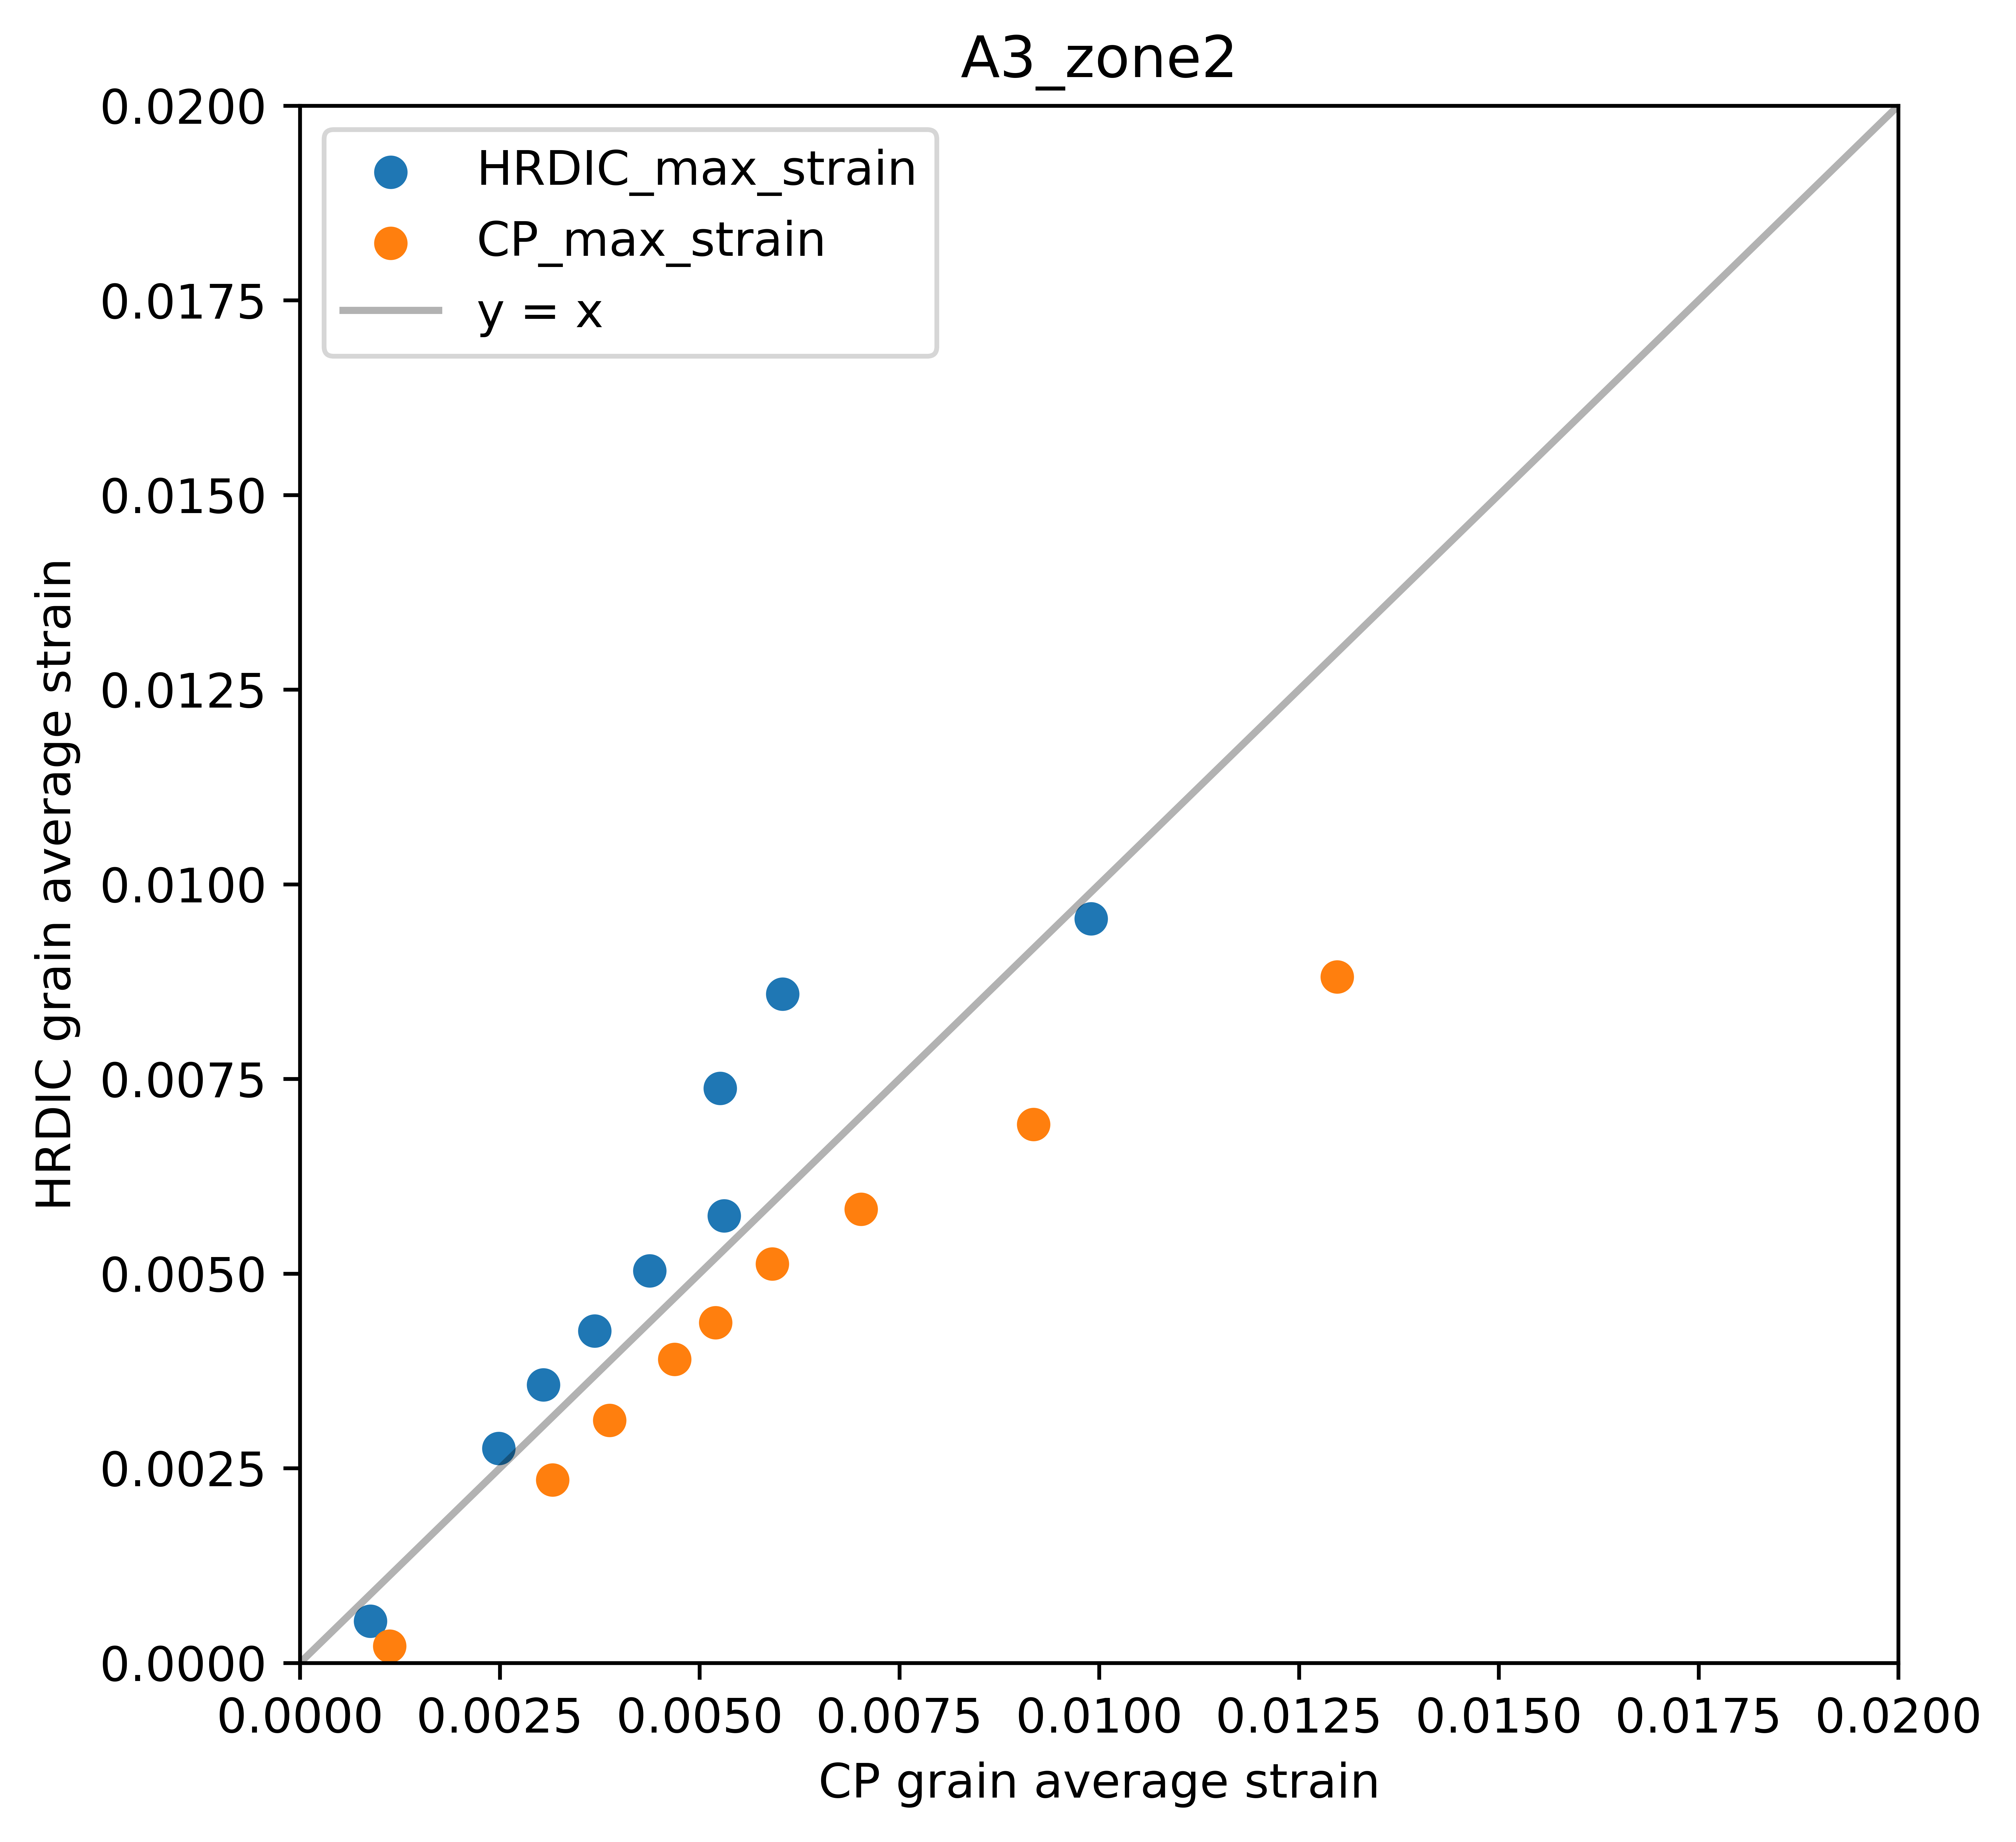

In [43]:
plt.figure(figsize=(6,6),dpi=1200)
#plt.errorbar(filtered_mean_CP_ESS,filtered_mean_HRDIC_ESS,filtered_std_CP_ESS,filtered_std_HRDIC_ESS,label='filtered ESS',fmt='o')
#plt.errorbar(mean_CP_ESS,mean_HRDIC_ESS,std_CP_ESS,std_HRDIC_ESS,label='unfiltered ESS',fmt='o')

#plt.errorbar(filtered_mean_CP_e11,filtered_mean_HRDIC_e11,filtered_std_CP_e11,filtered_std_HRDIC_e11,label='filtered e11',fmt='o')
#plt.errorbar(mean_CP_e11,mean_HRDIC_e11,std_CP_e11,std_HRDIC_e11,label='unfiltered e11',fmt='o')

plt.scatter(max_HRDIC_ESS_sim,max_HRDIC_ESS_exp,label='HRDIC_max_strain')
plt.scatter(max_CP_ESS_sim,max_CP_ESS_exp,label='CP_max_strain')
x = np.linspace(0,0.1,100)
y1 = x
plt.plot(x, y1, 'k-', alpha=0.3,label = 'y = x')

plt.ylim(0,0.02)
plt.xlim(0,0.02)
plt.xlabel('CP grain average strain')
plt.ylabel('HRDIC grain average strain')
plt.legend(loc='upper left')
plt.title(region)
#plt.savefig(output + '{}_strain_strain_plot.png'.format(region))

In [9]:
file_name1 = "A3_zone1_strain_comparison.pickle"
with open(file_name1, "rb") as pickle_file1:
    A3_zone1 = pickle.load(pickle_file1)
file_name2 = "A3_zone2_strain_comparison.pickle"
with open(file_name2, "rb") as pickle_file2:
    A3_zone2 = pickle.load(pickle_file2)
file_name3 = "A3_zone3_strain_comparison.pickle"
with open(file_name3, "rb") as pickle_file3:
    A3_zone3 = pickle.load(pickle_file3)

In [11]:
df = pd.DataFrame(A3_zone1['step_11'],columns=['Grain ID',r'Grain size ($\mu m^2$)','DIC e11','DIC ESS','CP e11','CP ESS'])
df.head()

Grain ID  Grain size ($\mu m^2$)   DIC e11   DIC ESS    CP e11    CP ESS
0     526.0              686.054688  0.008987  0.008219  0.009143  0.009267
1     553.0               60.585938  0.009776  0.009717  0.011839  0.010904
2     582.0               11.035156  0.009472  0.008716  0.010724  0.011320
3     616.0             1975.156250  0.009954  0.008641  0.015596  0.014649
4     632.0                6.835938  0.010979  0.011773  0.009559  0.009308

In [16]:
def calculate_means_and_std(strain_comparison, c=3):
    mean_HRDIC_ESS = []
    mean_CP_ESS = []
    std_HRDIC_ESS = []
    std_CP_ESS = []

    for step in range(0, len(strain_comparison)):
        mean_HRDIC_ESS.append(np.mean(strain_comparison['step_{}'.format(step + c)][:, 3]))
        mean_CP_ESS.append(np.mean(strain_comparison['step_{}'.format(step + c)][:, 5]))
        std_HRDIC_ESS.append(np.std(strain_comparison['step_{}'.format(step + c)][:, 3]))
        std_CP_ESS.append(np.std(strain_comparison['step_{}'.format(step + c)][:, 5]))
        
    return mean_HRDIC_ESS, mean_CP_ESS, std_HRDIC_ESS, std_CP_ESS

In [30]:
a3_zone1_strain = calculate_means_and_std(A3_zone1)
a3_zone2_strain = calculate_means_and_std(A3_zone2)
a3_zone3_strain = calculate_means_and_std(A3_zone3)
a3_zone1_strain[0][1:]

[0.0023440214968287326,
 0.0030341261217115417,
 0.003727353356136948,
 0.004352405329154703,
 0.005123946234703699,
 0.005805906212183343,
 0.007161336667256999,
 0.009302034070114193]

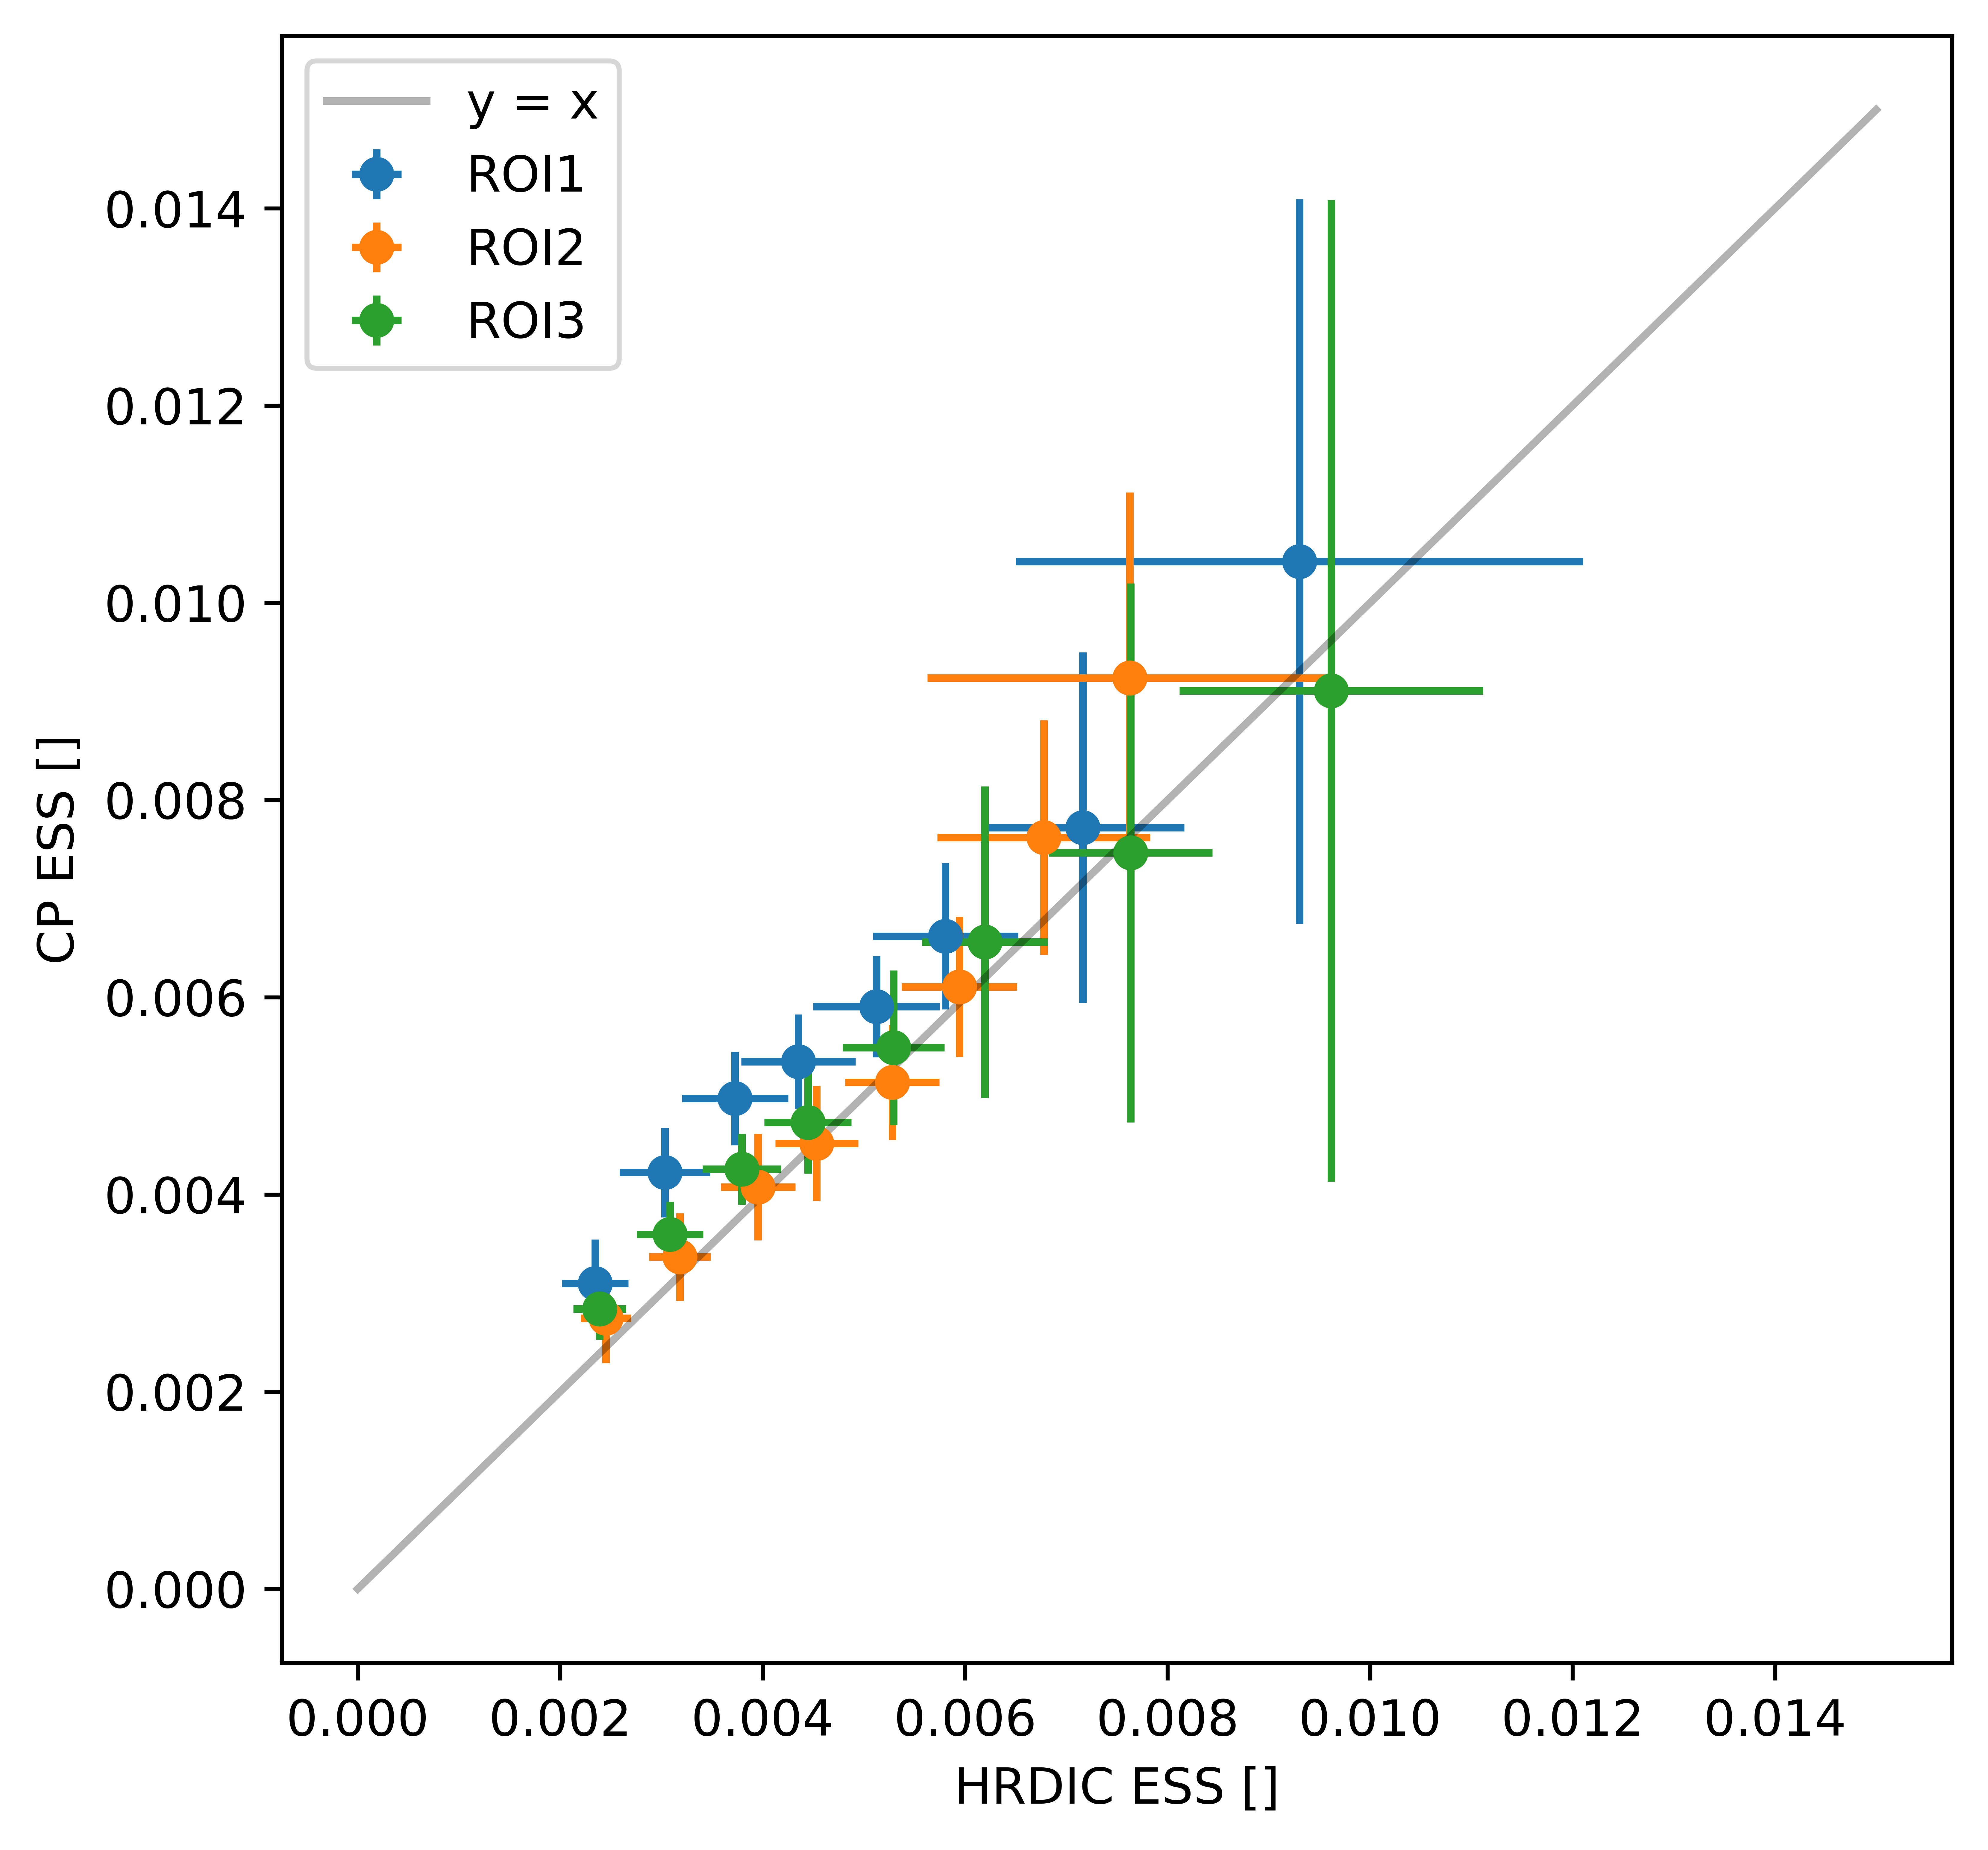

In [36]:
plt.figure(figsize=(6,6),dpi=1200)
plt.errorbar(a3_zone1_strain[0][1:],a3_zone1_strain[1][1:],a3_zone1_strain[2][1:],a3_zone1_strain[3][1:],label='ROI1', fmt='o')
plt.errorbar(a3_zone2_strain[0][1:],a3_zone2_strain[1][1:],a3_zone2_strain[2][1:],a3_zone2_strain[3][1:],label='ROI2', fmt='o')
plt.errorbar(a3_zone3_strain[0][1:],a3_zone3_strain[1][1:],a3_zone3_strain[2][1:],a3_zone3_strain[3][1:],label='ROI3', fmt='o')
plt.ylabel('CP ESS []')
plt.xlabel('HRDIC ESS []')
x = np.linspace(0,0.015,100)
y1 = x
plt.plot(x, y1, 'k-', alpha=0.3,label = 'y = x')
plt.legend()
plt.savefig(output + 'CP_vs_HRDIC_ESS.png')

import defdap
import matplotlib.pyplot as plt
import pandas as pd
import math
import numpy as np
import pickle
%matplotlib qt5

region = 'A3_zone2'
depth  = 1.75 /1000 #mm -> m
c=3
min_grain_size = 50#um

CP_mean_strain = np.load('{}_mean_strain.npy'.format(region)) #true strain
CP_mean_stress = np.load('{}_mean_stress.npy'.format(region)) # true stress
CP_eng_stress = CP_mean_stress[:,0,0] / (np.exp(CP_mean_strain[:,0,0]))

A3_zone2_e11 = np.load('{}_e11.npy'.format(region))
force_at_image_a3 = [30,113,332,1451, 1896,2342,2791,3250,3707, 4131,4495,4714,4823, 4860, 4915,4946,4974,4988,5009] # b2 named from tanist
force_at_image_b2 = [91,333,684,1985, 2461,2938,3417,3882,4271, 4518,4625, 4683, 4717,4742,4760,4773] # a3 named from tanist
width  = 3    /1000 #mm -> m
area = width * depth
exp_eng_stress_at_image_b2 = np.array(force_at_image_b2) / (area * 1000000)
exp_eng_stress_at_image_a3 = np.array(force_at_image_a3) / (area * 1000000)

plt.figure(figsize=(6,6),dpi=600)
plt.scatter(A3_zone2_e11,exp_eng_stress_at_image_a3[0:len(A3_zone2_e11)],label='Exp_A3_zone2')
plt.plot(A3_zone2_CP_mean_strain[:,0,0],A3_zone2_CP_eng_stress/1e6,label='CP_A3_zone2')
plt.xlabel('True strain ()')
plt.ylabel('Engineering stress (MPa)')
plt.legend()

file_name = "{}_strain_comparison.pickle".format(region)
with open(file_name, "rb") as pickle_file:
    strain_comparison = pickle.load(pickle_file)

mean_HRDIC_strain = []
mean_CP_strain = []
std_HRDIC_strain = []
std_CP_strain = []
for step in range(0,len(strain_comparison)):
    mean_HRDIC_strain.append(np.mean(strain_comparison['step_{}'.format(step+c)][:,2]))
    mean_CP_strain.append(np.mean(strain_comparison['step_{}'.format(step+c)][:,3]))
    std_HRDIC_strain.append(np.std(strain_comparison['step_{}'.format(step+c)][:,2]))
    std_CP_strain.append(np.std(strain_comparison['step_{}'.format(step+c)][:,3]))
    
filtered_mean_HRDIC_strain = []
filtered_mean_CP_strain = []
filtered_std_HRDIC_strain = []
filtered_std_CP_strain = []
filtered_data={}
for step in range(0,len(strain_comparison)):
    data_list= strain_comparison['step_{}'.format(step+c)].tolist()
    filtered_data_list = [row for row in data_list if row[1] >= min_grain_size]
    filtered_data['step_{}'.format(step+c)] = np.array(filtered_data_list)
    #(filtered_data)
for step in range(0,len(strain_comparison)):
    filtered_mean_HRDIC_strain.append(np.mean(filtered_data['step_{}'.format(step+c)][:,2]))
    filtered_mean_CP_strain.append(np.mean(filtered_data['step_{}'.format(step+c)][:,3]))
    filtered_std_HRDIC_strain.append(np.std(filtered_data['step_{}'.format(step+c)][:,2]))
    filtered_std_CP_strain.append(np.std(filtered_data['step_{}'.format(step+c)][:,3]))
    
plt.figure(figsize=(8,8),dpi=600)
plt.errorbar(filtered_mean_CP_strain,filtered_mean_HRDIC_strain,filtered_std_CP_strain,filtered_std_HRDIC_strain,label='{}_filtered'.format(region))
plt.errorbar(mean_CP_strain,mean_HRDIC_strain,std_CP_strain,std_HRDIC_strain,label='{}_unfiltered'.format(region))
x = np.linspace(0,0.1,100)
y1 = x
plt.plot(x, y1, 'k-', alpha=0.3,label = 'y = x')
plt.ylim(0,0.015)
plt.xlim(0,0.015)
plt.ylabel('CP grain average effective shear strain')
plt.xlabel('HRDIC measured grain average effective shear strain')
plt.legend(loc='upper right')

